In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
def load(fname: str):
    return pd.read_csv(fname, header=None).sort_index(0)

# Constant problem size

In [102]:
parallelT = load('row-uf50-218.csv')
parallelF = load('row-uuf50-218.csv')
serialT = load('serial-uf50-218.csv')
serialF = load('serial-uuf50-218.csv')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  


In [103]:
d = serialF[2] - parallelF[2]

In [104]:
serialF.iloc[[377]]

,0,1,2
377,uuf50-0362.cnf,F,12055


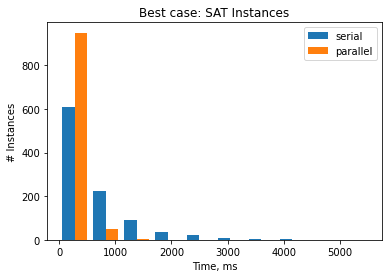

In [105]:
plt.hist([serialT[2], parallelT[2]], label=['serial', 'parallel'])
plt.legend(loc='upper right')
plt.title("Best case: SAT Instances")
plt.ylabel("# Instances")
plt.xlabel("Time, ms")
plt.show()

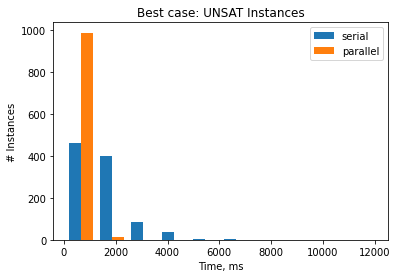

In [106]:
plt.hist([serialF[2], parallelF[2]], label=['serial', 'parallel'])
plt.legend(loc='upper right')
plt.title("Best case: UNSAT Instances")
plt.ylabel("# Instances")
plt.xlabel("Time, ms")
plt.show()

In [107]:
((serialT[2] - parallelT[2]) / serialT[2]).mean()

0.7192709279697536

In [108]:
((serialF[2] - parallelF[2]) / serialF[2]).mean()

0.7266748505370817

# Varied problem size

In [109]:
xs = [645, 538, 430, 325]
p24 = load('parallel-mc17-sat.csv')[2]
p32 = load('parallel-mc20-sat.csv')[2]
s24 = load('serial-mc17-sat.csv')[2]
s32 = load('serial-mc20-sat.csv')[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  


No handles with labels found to put in legend.


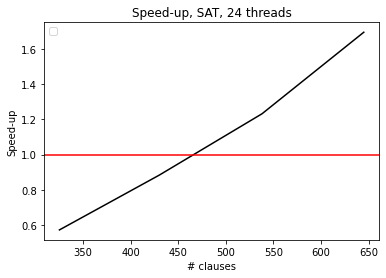

In [110]:
plt.plot(xs, s24 / p24, "black")
plt.title("Speed-up, SAT, 24 threads")
plt.xlabel("# clauses")
plt.ylabel("Speed-up")
plt.legend(loc="upper left")
plt.axhline(1, color='red')
plt.show()

No handles with labels found to put in legend.


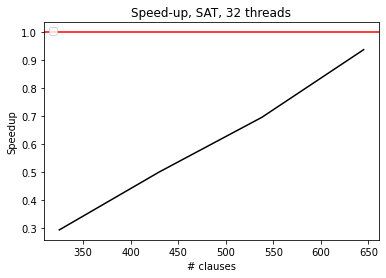

In [111]:
plt.plot(xs, s32 / p32, "black")
plt.title("Speed-up, SAT, 32 threads")
plt.xlabel("# clauses")
plt.ylabel("Speedup")
plt.legend(loc="upper left")
plt.axhline(1, color='red')
plt.show()

In [112]:
xs = [645, 538, 430, 325]
punsat= load('parallel-mc18-unsat.csv')[2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  


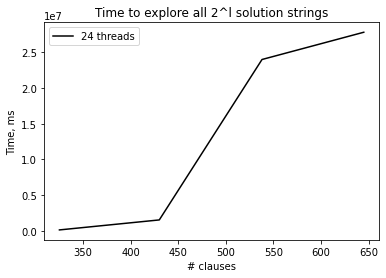

In [113]:
plt.plot(xs, punsat, "black", label="24 threads")
plt.title("Time to explore all 2^l solution strings")
plt.xlabel("# clauses")
plt.ylabel("Time, ms")
plt.legend(loc="upper left")
plt.show()

# Varied Threads

In [114]:
dfls = list()
for i in range(1,32):
    df = load(f"t-{i}.csv")
    dfls.append(df)
ys = pd.concat(dfls)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  


In [116]:
ys = ys[2]
xs = list(range(1, 32))

No handles with labels found to put in legend.


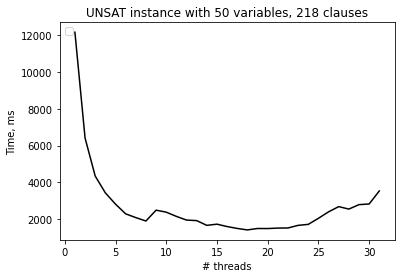

In [117]:
plt.plot(xs, ys, "black")
plt.title("UNSAT instance with 50 variables, 218 clauses")
plt.xlabel("# threads")
plt.ylabel("Time, ms")
plt.legend(loc="upper left")
plt.show()